Loaded dataset with shape: (605, 22)
                       name                            title  \
0                 a2gov_org              Ann Arbor, Michigan   
1  acikveri-sahinbey-bel-tr  Açık Veri Portali - Test Yayını   
2          africa_open_data                 Africa Open Data   
3   ajuntament-de-tarragona              Open Data Tarragona   
4     ajuntament-de-terassa                Open Data Terassa   

                                            url                   author  \
0  https://www.a2gov.org/services/data-catalog/        City of Ann Arbor   
1      https://acikveri.sahinbey.bel.tr/dataset                 pinardag   
2                   https://africaopendata.org/         Africa Open Data   
3               https://opendata.tarragona.cat/  Ajuntament de Tarragona   
4                https://opendata.terrassa.cat/    Ajuntament de Terassa   

                 publisher      issued publisher_classification  \
0        City of Ann Arbor         NaN                

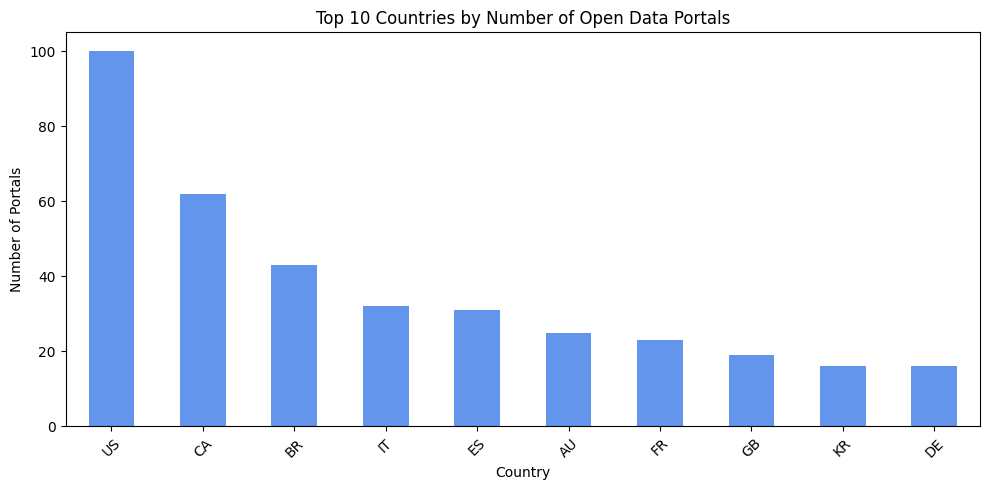

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 1. LOAD THE DATA
# ---------------------------------------------------
url = "https://raw.githubusercontent.com/okfn/dataportals.org/main/data/portals.csv"
df = pd.read_csv(url)

print("Loaded dataset with shape:", df.shape)
print(df.head(), "\n")


# ---------------------------------------------------
# 2. SAVE THE RAW DATA TO YOUR COMPUTER
# ---------------------------------------------------
df.to_csv("raw_portals.csv", index=False)
print("Saved file: raw_portals.csv\n")


# ---------------------------------------------------
# 3. PROCESS / CLEAN THE DATA
# ---------------------------------------------------

# Standardize column names
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
)

# Remove rows with no URL (invalid portals)
df = df.dropna(subset=["url"])

# Remove duplicates
df = df.drop_duplicates()

print("Cleaned dataset shape:", df.shape)
print(df.head(), "\n")


# ---------------------------------------------------
# 4. VISUALIZE THE DATA
# Example: Top 10 countries by number of open data portals
# ---------------------------------------------------

country_counts = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
country_counts.plot(kind="bar", color="cornflowerblue")
plt.title("Top 10 Countries by Number of Open Data Portals")
plt.xlabel("Country")
plt.ylabel("Number of Portals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()